In [6]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
dfh = pd.read_csv(r"CSVs\current-covid-patients-hospital.csv")

dfc = pd.read_csv('https://raw.githubusercontent.com/ZelshaR/Project/main/NoteBooks/CSVs/newdfc.csv')
dfc.index = dfc['Unnamed: 0'].values
del dfc['Unnamed: 0']
dfc['nu'] = 0
dfc['nu'] = dfc.index

dfd = pd.read_csv('https://raw.githubusercontent.com/ZelshaR/Project/main/NoteBooks/CSVs/newdfd.csv')
dfd.index = dfd['Unnamed: 0'].values
del dfd['Unnamed: 0']
dfd['nu'] = 0
dfd['nu'] = dfd.index

dfdsr = pd.read_csv('https://raw.githubusercontent.com/ZelshaR/Project/main/NoteBooks/CSVs/newdfdsr.csv')
dfdsr.index = dfdsr['Unnamed: 0'].values
del dfdsr['Unnamed: 0']


dfcsr = pd.read_csv('https://raw.githubusercontent.com/ZelshaR/Project/main/NoteBooks/CSVs/newdfcsr.csv')
dfcsr.index = dfcsr['Unnamed: 0'].values
del dfcsr['Unnamed: 0']

dff = pd.read_csv(r"CSVs\WPP2019_TotalPopulationBySex.csv")

In [5]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160694,ZWE,Africa,Zimbabwe,2022-02-05,230402.0,232.0,141.000,5362.0,5.0,4.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
160695,ZWE,Africa,Zimbabwe,2022-02-06,230402.0,0.0,134.571,5362.0,0.0,3.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
160696,ZWE,Africa,Zimbabwe,2022-02-07,230402.0,0.0,105.143,5362.0,0.0,3.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
160697,ZWE,Africa,Zimbabwe,2022-02-08,230603.0,201.0,107.429,5366.0,4.0,2.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [6]:
df['location'] == dfc.columns[0]

0          True
1          True
2          True
3          True
4          True
          ...  
138722    False
138723    False
138724    False
138725    False
138726    False
Name: location, Length: 138727, dtype: bool

In [7]:
dfc

,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Asia,...,United Kingdom,United States,Upper middle income,Uruguay,Uzbekistan,Venezuela,World,Yemen,Zambia,Zimbabwe
150,784.0,6117.0,23.0,133.0,0.0,3.0,0.0,795.0,251.0,27571.0,...,1107.0,24084.0,61570.0,5.0,78.0,89.0,136861.0,27.0,0.0,25.0
151,651.0,5247.0,15.0,127.0,0.0,2.0,1.0,637.0,355.0,29201.0,...,1070.0,19454.0,46710.0,2.0,77.0,51.0,106731.0,13.0,0.0,4.0
152,656.0,5785.0,6.0,119.0,1.0,0.0,0.0,564.0,210.0,28116.0,...,1444.0,16965.0,36399.0,2.0,79.0,152.0,95705.0,31.0,32.0,25.0
153,742.0,4878.0,21.0,113.0,79.0,0.0,0.0,904.0,517.0,30553.0,...,1470.0,21283.0,59646.0,1.0,58.0,157.0,121708.0,45.0,0.0,3.0
154,775.0,5097.0,20.0,107.0,7.0,0.0,0.0,949.0,515.0,33398.0,...,1349.0,19771.0,52532.0,2.0,83.0,133.0,114183.0,20.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,19.0,20535.0,357.0,185.0,0.0,21.0,1.0,1690.0,419.0,74300.0,...,41574.0,61013.0,120138.0,279.0,212.0,473.0,506817.0,1.0,32.0,1082.0
704,14.0,14651.0,328.0,172.0,0.0,15.0,0.0,1294.0,327.0,89989.0,...,43361.0,34215.0,109532.0,104.0,228.0,785.0,423320.0,4.0,18.0,523.0
705,54.0,11032.0,172.0,193.0,621.0,0.0,1.0,2477.0,95.0,74170.0,...,51746.0,192917.0,98156.0,178.0,223.0,0.0,604208.0,9.0,15.0,0.0
706,9.0,20055.0,393.0,197.0,184.0,42.0,0.0,3089.0,240.0,83308.0,...,45473.0,108930.0,117084.0,237.0,147.0,543.0,688201.0,9.0,47.0,2555.0


In [8]:
massive = [0]*708
for i in range(708):
    massive[i] = i
c = np.unique(df['location'])
dfv = pd.DataFrame(index = massive, columns = c)

In [9]:
dfc

,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Asia,...,United Kingdom,United States,Upper middle income,Uruguay,Uzbekistan,Venezuela,World,Yemen,Zambia,Zimbabwe
150,784.0,6117.0,23.0,133.0,0.0,3.0,0.0,795.0,251.0,27571.0,...,1107.0,24084.0,61570.0,5.0,78.0,89.0,136861.0,27.0,0.0,25.0
151,651.0,5247.0,15.0,127.0,0.0,2.0,1.0,637.0,355.0,29201.0,...,1070.0,19454.0,46710.0,2.0,77.0,51.0,106731.0,13.0,0.0,4.0
152,656.0,5785.0,6.0,119.0,1.0,0.0,0.0,564.0,210.0,28116.0,...,1444.0,16965.0,36399.0,2.0,79.0,152.0,95705.0,31.0,32.0,25.0
153,742.0,4878.0,21.0,113.0,79.0,0.0,0.0,904.0,517.0,30553.0,...,1470.0,21283.0,59646.0,1.0,58.0,157.0,121708.0,45.0,0.0,3.0
154,775.0,5097.0,20.0,107.0,7.0,0.0,0.0,949.0,515.0,33398.0,...,1349.0,19771.0,52532.0,2.0,83.0,133.0,114183.0,20.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,19.0,20535.0,357.0,185.0,0.0,21.0,1.0,1690.0,419.0,74300.0,...,41574.0,61013.0,120138.0,279.0,212.0,473.0,506817.0,1.0,32.0,1082.0
704,14.0,14651.0,328.0,172.0,0.0,15.0,0.0,1294.0,327.0,89989.0,...,43361.0,34215.0,109532.0,104.0,228.0,785.0,423320.0,4.0,18.0,523.0
705,54.0,11032.0,172.0,193.0,621.0,0.0,1.0,2477.0,95.0,74170.0,...,51746.0,192917.0,98156.0,178.0,223.0,0.0,604208.0,9.0,15.0,0.0
706,9.0,20055.0,393.0,197.0,184.0,42.0,0.0,3089.0,240.0,83308.0,...,45473.0,108930.0,117084.0,237.0,147.0,543.0,688201.0,9.0,47.0,2555.0


In [10]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
df['nam'] = 0
for i in range(138727):
    df['nam'][i] = (dt.date(2020,df['date'][i].month,df['date'][i].day) - dt.date(2020,1,1)).days
for i in range(138727):
    if df['date'].iloc[i].year == 2021:
        df['nam'].iloc[i] = df['nam'].iloc[i]+365

<ipython-input-11-7ee7ee187150>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nam'][i] = (dt.date(2020,df['date'][i].month,df['date'][i].day) - dt.date(2020,1,1)).days
C:\Users\bekte\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [12]:
for i in range(138727):
    dfv[df['location'][i]][df['nam'][i]]=df['people_fully_vaccinated'][i]

In [13]:
df['new_vaccinations'][653]

nan

In [14]:
dfv

,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,NaN,104928289.0,NaN,NaN,NaN,NaN,NaN,NaN,30213089.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3507420318.0,NaN,NaN,2876054.0
704,NaN,105255538.0,975573.0,NaN,50333.0,NaN,NaN,57345.0,30265301.0,NaN,...,NaN,NaN,NaN,NaN,54435627.0,NaN,3517572126.0,NaN,NaN,2884043.0
705,NaN,106175953.0,978333.0,NaN,NaN,3280340.0,NaN,NaN,NaN,516989.0,...,NaN,45349.0,NaN,NaN,55012304.0,NaN,3526925941.0,NaN,740961.0,2892364.0
706,NaN,106373204.0,981170.0,NaN,NaN,NaN,NaN,NaN,30397618.0,NaN,...,NaN,NaN,NaN,NaN,55508435.0,NaN,3536464862.0,NaN,747604.0,2910951.0


In [15]:
dfcsr = dfc
dfvsr = dfv
dfcsr = dfc.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x) #лагорифмирует все значения из датафреймов
dfvsr = dfv.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x) #очень плохо реагирует на нули так как лагорифма его нет

C:\Users\bekte\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\bekte\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

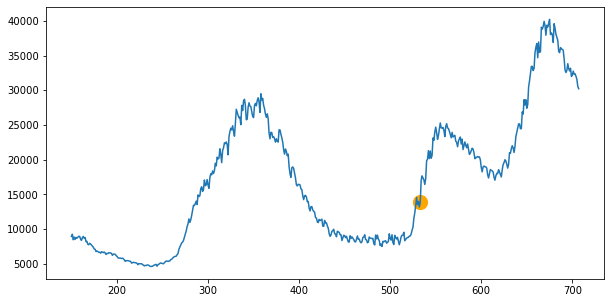

In [16]:
plt.figure(figsize=(10,5))
#plt.plot(dfv.index, dfv['Russia'].values, c = 'red')
plt.plot(dfc.index, dfc['Russia'].values)
plt.scatter(533, 13857.0, c = 'orange', s = 200)
plt.show

In [17]:
dfv['Russia']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
703    58480065.0
704    58695024.0
705    58798583.0
706    59156207.0
707    59561710.0
Name: Russia, Length: 708, dtype: object

In [18]:
dfv = dfv.fillna(0)

In [19]:
a = 0
for i in range(554):
    a = a + dfc.iloc[i]['Russia']


In [20]:
a

9269978.0

In [21]:
max(dfv['Russia'])

59561710.0

In [22]:
dfv

,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,0.0,104928289.0,0.0,0.0,0.0,0.0,0.0,0.0,30213089.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,3.507420e+09,0.0,0.0,2876054.0
704,0.0,105255538.0,975573.0,0.0,50333.0,0.0,0.0,57345.0,30265301.0,0.0,...,0.0,0.0,0,0.0,54435627.0,0.0,3.517572e+09,0.0,0.0,2884043.0
705,0.0,106175953.0,978333.0,0.0,0.0,3280340.0,0.0,0.0,0.0,516989.0,...,0.0,45349.0,0,0.0,55012304.0,0.0,3.526926e+09,0.0,740961.0,2892364.0
706,0.0,106373204.0,981170.0,0.0,0.0,0.0,0.0,0.0,30397618.0,0.0,...,0.0,0.0,0,0.0,55508435.0,0.0,3.536465e+09,0.0,747604.0,2910951.0


In [23]:
dff['Time'] == 1950

0          True
1         False
2         False
3         False
4         False
          ...  
280927    False
280928    False
280929    False
280930    False
280931    False
Name: Time, Length: 280932, dtype: bool

In [24]:
np.unique(dff['Location'])

array(['Afghanistan', 'Africa', 'African Group', 'African Union',
       'African Union: Central Africa', 'African Union: Eastern Africa',
       'African Union: Northern Africa', 'African Union: Southern Africa',
       'African Union: Western Africa',
       'African, Caribbean and Pacific (ACP) Group of States', 'Albania',
       'Algeria', 'American Samoa', 'Andean Community', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Asia',
       'Asia-Pacific Economic Cooperation (APEC)', 'Asia-Pacific Group',
       'Association of Southeast Asian Nations (ASEAN)', 'Australia',
       'Australia/New Zealand', 'Austria', 'Azerbaijan', 'BRIC', 'BRICS',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Belt-Road Initiative (BRI)',
       'Belt-Road Initiative: Africa', 'Belt-Road Initiative: Asia',
       'Belt-Road Initiative: Europe',
       'Belt-Road Initiative: Latin America and the Cari

In [25]:
a = dff[dff['Location'] == 'Russian Federation']['PopTotal'].iloc[71] * 1000
b = 0 
for i in range(len(dfv)):
    if dfv['Russia'].values[i] > a * 0.3:
        print(i, dfv['Russia'].values[i])
        break

645 44750694.0


In [26]:
dfv

,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,0.0,104928289.0,0.0,0.0,0.0,0.0,0.0,0.0,30213089.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,3.507420e+09,0.0,0.0,2876054.0
704,0.0,105255538.0,975573.0,0.0,50333.0,0.0,0.0,57345.0,30265301.0,0.0,...,0.0,0.0,0,0.0,54435627.0,0.0,3.517572e+09,0.0,0.0,2884043.0
705,0.0,106175953.0,978333.0,0.0,0.0,3280340.0,0.0,0.0,0.0,516989.0,...,0.0,45349.0,0,0.0,55012304.0,0.0,3.526926e+09,0.0,740961.0,2892364.0
706,0.0,106373204.0,981170.0,0.0,0.0,0.0,0.0,0.0,30397618.0,0.0,...,0.0,0.0,0,0.0,55508435.0,0.0,3.536465e+09,0.0,747604.0,2910951.0


In [27]:
dfc.index = np.unique(df['date'])[150:704]

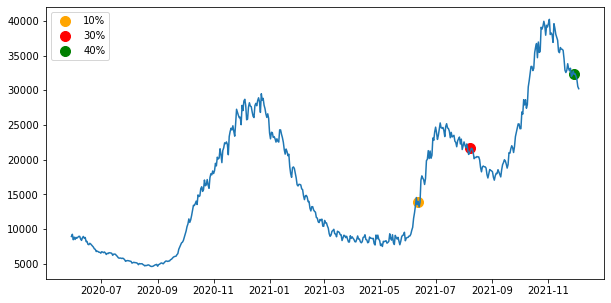

In [28]:
plt.figure(figsize=(10,5))
#plt.plot(dfv.index, dfv['Russia'].values, c = 'red')
plt.plot(dfc.index, dfc['Russia'].values)
plt.scatter(18790, 13857.0, c = 'orange', s = 100, label ='10%')
plt.scatter(18847, 21661.0, c = 'red', s = 100, label ='30%')
plt.scatter(18960, 32374.0, c = 'green', s = 100, label ='40%')
plt.legend()
plt.show()

In [10]:
dfc

,Afghanistan,Africa,Albania,Algeria,Angola,Argentina,Armenia,Asia,Australia,Austria,...,United Kingdom,United States,Upper middle income,Uruguay,Uzbekistan,Venezuela,World,Zambia,Zimbabwe,nu
1,0,0,0.0,0,0,NaN,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,1
2,0,0,0.0,0,0,NaN,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,2
3,0,0,0.0,0,0,NaN,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,3
4,0,0,0.0,0,0,NaN,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,4
5,0,0,0.0,0,0,NaN,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,353,20558,0.0,792,11,21836.0,4032,577587,22985,32258,...,60114.0,104104.0,693376,9074,912,2157,2095519,0,232,765
766,480,14863,1452.0,378,13,12664.0,2467,583347,25247,29324,...,53326.0,80051.0,529187,6094,887,1448,1833762,429,0,766
767,733,13575,251.0,502,45,25406.0,1631,563095,27373,27299,...,64322.0,336568.0,528556,6968,832,0,2235580,111,0,767
768,815,15133,841.0,610,15,32790.0,2486,633995,31510,27087,...,66634.0,221262.0,721705,8444,773,1694,3129028,319,201,768


In [17]:
a = 0
for i in range(5, 750, 7):
    a = a + df[df['location'] == 'World']['new_cases'].iloc[i]
casin1=a
print('Заболевших в понедельник:', a)
a = 0
for i in range(6, 750, 7):
    a = a + df[df['location'] == 'World']['new_cases'].iloc[i]
casin2=a
print('Заболевших во вторник:', a)
a = 0
for i in range(0, 750, 7):
    a = a + df[df['location'] == 'World']['new_cases'].iloc[i]
casin3=a
print('Заболевших в среду:', a)
a = 0
for i in range(1, 750, 7):
    a = a + df[df['location'] == 'World']['new_cases'].iloc[i]
casin4=a
print('Заболевших в четверг:', a)
a = 0
for i in range(2, 750, 7):
    a = a + df[df['location'] == 'World']['new_cases'].iloc[i]
casin5=a
print('Заболевших в пятницу:', a)
a = 0
for i in range(3, 750, 7):
    a = a + df[df['location'] == 'World']['new_cases'].iloc[i]
casin6=a
print('Заболевших в субботу:', a)
a = 0
for i in range(4, 750, 7):
    a = a + df[df['location'] == 'World']['new_cases'].iloc[i]
casin7=a
print('Заболевших в воскресенье:', a)
print('Всего заболевших:', df[df['location'] == 'World']['total_cases'].iloc[749])
casinall= df[df['location'] == 'World']['total_cases'].iloc[749]

Заболевших в понедельник: 53900404.0
Заболевших во вторник: 61287551.0
Заболевших в среду: 65375155.0
Заболевших в четверг: 62900042.0
Заболевших в пятницу: 63325693.0
Заболевших в субботу: 51021337.0
Заболевших в воскресенье: 44048155.0
Всего заболевших: 403258184.0


In [34]:
a = 0
for i in range(0, 59):
    a = a + df[df['location'] == 'World']['new_cases'].iloc[i]
casinwin20=a
print('Заболевших зимой 2020:', a)
a = 0
for i in range(334, 424):
    a = a + df[df['location'] == 'World']['new_cases'].iloc[i]
casinwin21=a
print('Заболевших зимой 2021, в январе и феврале:', a)
for i in range(699, 730):
    a = a + df[df['location'] == 'World']['new_cases'].iloc[i]
casinwin21=a
print('Заболевших зимой 2021, в декабре:', a)
for i in range(334, 424):
    a = a + df[df['location'] == 'World']['new_cases'].iloc[i]
casinwin21=a
print('Заболевших зимой 2021:', a)
a = 0
for i in range(60, 152):
    a = a + df[df['location'] == 'World']['new_cases'].iloc[i]
casinspr20=a
print('Заболевших весной 2020:', a)
a = 0
for i in range(425, 514):
    a = a + df[df['location'] == 'World']['new_cases'].iloc[i]
casinspr21=a
print('Заболевших весной 2021:', a)
a = 0
for i in range(153, 245):
    a = a + df[df['location'] == 'World']['new_cases'].iloc[i]
casinsum20=a
print('Заболевших летом 2020:', a)
a = 0
for i in range(515, 607):
    a = a + df[df['location'] == 'World']['new_cases'].iloc[i]
casinsum21=a
print('Заболевших летом 2021:', a)
a = 0
for i in range(246, 333):
    a = a + df[df['location'] == 'World']['new_cases'].iloc[i]
casinaut20=a
print('Заболевших осенью 2020:', a)
a = 0
for i in range(607, 699):
    a = a + df[df['location'] == 'World']['new_cases'].iloc[i]
casinaut21=a
print('Заболевших осенью 2021:', a)
print('Всего заболевших:', df[df['location'] == 'World']['total_cases'].iloc[749])

Заболевших зимой 2020: 277008.0
Заболевших зимой 2021: 46192816.0
Заболевших весной 2020: 8625603.0
Заболевших весной 2021: 54973659.0
Заболевших летом 2020: 22573138.0
Заболевших летом 2021: 50179346.0
Заболевших осенью 2020: 43817100.0
Заболевших осенью 2021: 38154342.0
Всего заболевших: 267829762.0
